# Stock Prediction And Forecasting:


In [1]:
import pandas as pd
d=pd.read_csv('Reliance.csv')
print(d)

            Date         Open         High          Low        Close  \
0     2015-11-18   463.799988   465.649994   454.975006   456.000000   
1     2015-11-19   459.450012   469.350006   458.625000   467.375000   
2     2015-11-20   467.000000   476.399994   462.774994   473.424988   
3     2015-11-23   475.000000   478.950012   473.100006   476.875000   
4     2015-11-24   476.500000   485.799988   475.524994   483.850006   
...          ...          ...          ...          ...          ...   
1228  2020-11-10  2077.000000  2090.000000  2041.199951  2084.550049   
1229  2020-11-11  2089.000000  2095.000000  1978.099976  1997.199951   
1230  2020-11-12  1981.000000  2008.449951  1965.000000  1980.000000   
1231  2020-11-13  1982.000000  2036.650024  1981.750000  1996.400024   
1232  2020-11-17  2085.000000  2085.000000  1985.000000  1993.250000   

        Adj Close      Volume  
0      436.671021   5142766.0  
1      447.563873   5569752.0  
2      453.357422   5167930.0  
3      

In [2]:
d.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0
1,2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0
2,2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0
3,2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0
4,2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0


In [3]:
d.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1228,2020-11-10,2077.0,2090.000000,2041.199951,2084.550049,2084.550049,17045147.0
1229,2020-11-11,2089.0,2095.000000,1978.099976,1997.199951,1997.199951,26178477.0
1230,2020-11-12,1981.0,2008.449951,1965.000000,1980.000000,1980.000000,18481466.0
1231,2020-11-13,1982.0,2036.650024,1981.750000,1996.400024,1996.400024,20946864.0
1232,2020-11-17,2085.0,2085.000000,1985.000000,1993.250000,1993.250000,21479385.0


In [4]:
d_close = d['Close']

In [5]:
d_close.shape

(1233,)

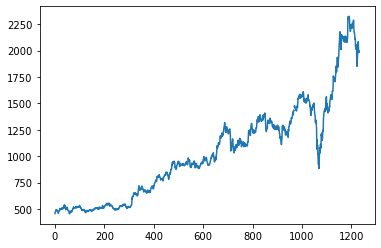

In [7]:
import matplotlib.pyplot as plt
plt.plot(d_close)

In [11]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
d_close = scaler.fit_transform(np.array(d_close).reshape(-1,1))
d_close.shape

(1233, 1)

In [12]:
d_close

array([[0.00145623],
       [0.00753497],
       [0.01076806],
       ...,
       [0.81587418],
       [0.82463827],
       [0.82295492]])

In [20]:
training_size = int(len(d_close) * 0.75)
test_size = len(d_close) - training_size
train_data, test_data = d_close[0:training_size,:], d_close[training_size:len(d_close),:1]
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)
x_test, y_test

array([[[0.43963337],
        [0.43696139],
        [0.42402906],
        ...,
        [0.58271763],
        [0.57507582],
        [0.5721099 ]],

       [[0.43696139],
        [0.42402906],
        [0.43957994],
        ...,
        [0.57507582],
        [0.5721099 ],
        [0.57961817]],

       [[0.42402906],
        [0.43957994],
        [0.43474371],
        ...,
        [0.5721099 ],
        [0.57961817],
        [0.60265058]],

       ...,

       [[0.67741246],
        [0.68112648],
        [0.67580927],
        ...,
        [0.84213971],
        [0.85365588],
        [0.8717452 ]],

       [[0.68112648],
        [0.67580927],
        [0.68850115],
        ...,
        [0.85365588],
        [0.8717452 ],
        [0.82506575]],

       [[0.67580927],
        [0.68850115],
        [0.67861484],
        ...,
        [0.8717452 ],
        [0.82506575],
        [0.81587418]]])

In [21]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_train
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
x_test

array([[[0.43963337],
        [0.43696139],
        [0.42402906],
        ...,
        [0.58271763],
        [0.57507582],
        [0.5721099 ]],

       [[0.43696139],
        [0.42402906],
        [0.43957994],
        ...,
        [0.57507582],
        [0.5721099 ],
        [0.57961817]],

       [[0.42402906],
        [0.43957994],
        [0.43474371],
        ...,
        [0.5721099 ],
        [0.57961817],
        [0.60265058]],

       ...,

       [[0.67741246],
        [0.68112648],
        [0.67580927],
        ...,
        [0.84213971],
        [0.85365588],
        [0.8717452 ]],

       [[0.68112648],
        [0.67580927],
        [0.68850115],
        ...,
        [0.85365588],
        [0.8717452 ],
        [0.82506575]],

       [[0.67580927],
        [0.68850115],
        [0.67861484],
        ...,
        [0.8717452 ],
        [0.82506575],
        [0.81587418]]])

In [35]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape



(1, 0)

In [37]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[]

In [41]:
day_new=np.arange(1,101)
day_new


array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130])

In [42]:
day_pred=np.arange(101,131)
day_pred

array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130])

In [43]:
import matplotlib.pyplot as plt
len(d)

1233

In [51]:
import pandas as pd
import numpy as np
import scipy.stats

class Statistics:
    def __init__(self,series):
        self.series = np.array(series)
        self.n = len(series)
    def mean(self):
        return np.mean(self.series)
    def std(self):
        return np.std(self.series)
    def stderr(self):
        return scipy.stats.sem(self.series)
    def percentiles(self,p=[.25,.5,.75]):
        return pd.Series(self.series).describe(percentiles=p)
    def pos_perc(self):
        return 100*sum(self.series>0)/self.n
    def skewness(self):
        return scipy.stats.skew(self.series)
    def kurtosis(self):
        return scipy.stats.kurtosis(self.series)
    def VaR(self,confidence):
        indx = int(confidence*self.n/100)
        return sorted(self.series)[indx-1]
    def CVaR(self,confidence):
        indx = int(confidence*self.n/100)
        return sum(sorted(self.series)[:indx])/indx
    def MDD(self):
        money = np.cumprod(1+self.series/100)
        maximums = np.maximum.accumulate(money)
        drawdowns = 1 - money/maximums
        return np.max(drawdowns)
    def sharpe(self,risk_free_rate = 0.0003):
        mu = self.mean()
        sig = self.std()
        sharpe_d = (mu-risk_free_rate)/sig
        return (252**0.5)*sharpe_d 
    def shortreport(self):
        print('Mean \t\t',self.mean())
        print('Standard dev \t',self.std())
        print('Sharpe ratio \t',self.sharpe())       
    def report(self):
        print('Mean \t\t',self.mean())
        print('Standard dev \t',self.std())
        print('Sharpe ratio \t',self.sharpe())
        print('Standard Error \t',self.stderr())
        print('Share>0 \t',self.pos_perc())
        print('Skewness \t',self.skewness())
        print('Kurtosis \t',self.kurtosis())
        print('VaR_1 \t\t',self.VaR(1))
        print('VaR_2 \t\t',self.VaR(2))
        print('VaR_5 \t\t',self.VaR(5))
        print('CVaR_1 \t\t',self.CVaR(1))
        print('CVaR_2 \t\t',self.CVaR(2))
        print('CVaR_5 \t\t',self.CVaR(5))
        print('MDD \t\t',self.MDD())
        print(self.percentiles())

<AxesSubplot:>

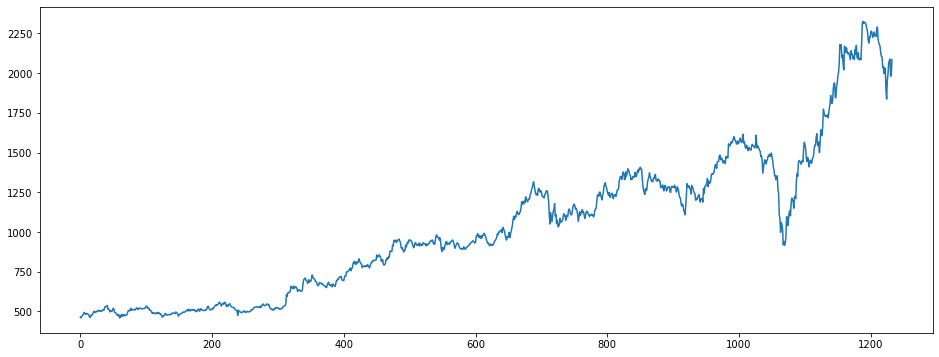

In [52]:
d['Open'].plot(figsize=(16,6))

<AxesSubplot:>

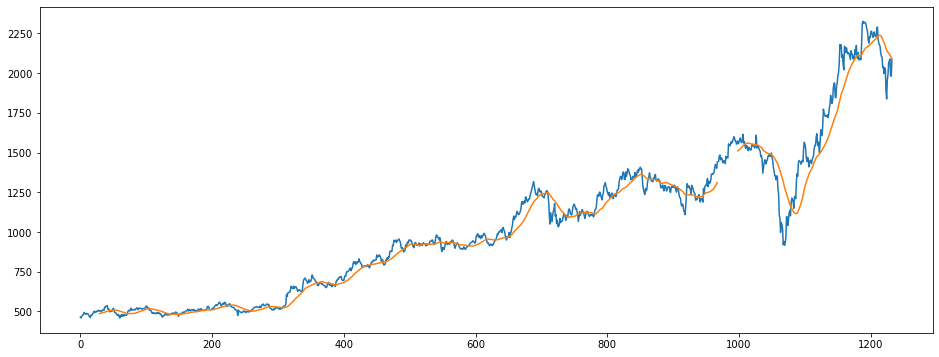

In [53]:
d['Open'].plot(figsize=(16,6))
d.rolling(window=30).mean()['Close'].plot()

In [55]:
d.rolling(7).mean().head(20)

,Open,High,Low,Close,Adj Close,Volume
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,474.535714,481.196429,470.882141,477.339286,457.105796,6.187425e+06
7,478.171430,484.989288,474.621425,481.274998,460.874682,7.406752e+06
8,481.392857,487.853572,477.764282,483.500000,463.005371,7.458881e+06
9,483.696429,489.775003,480.546426,485.721431,465.132638,7.215235e+06


<AxesSubplot:>

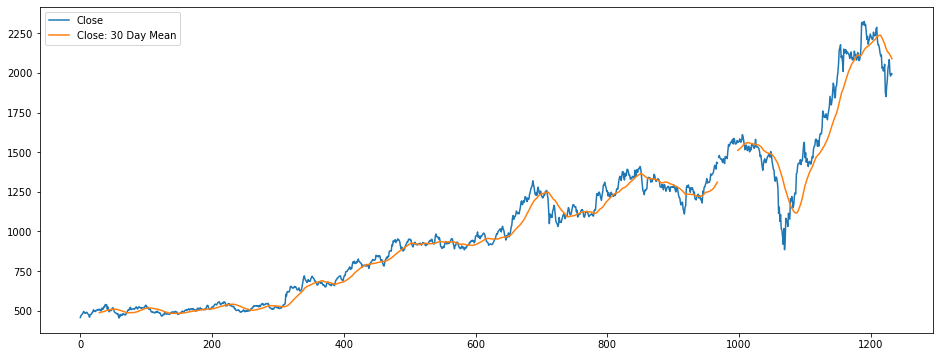

In [58]:
d['Close: 30 Day Mean'] = d['Close'].rolling(window=30).mean()
d[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

<AxesSubplot:>

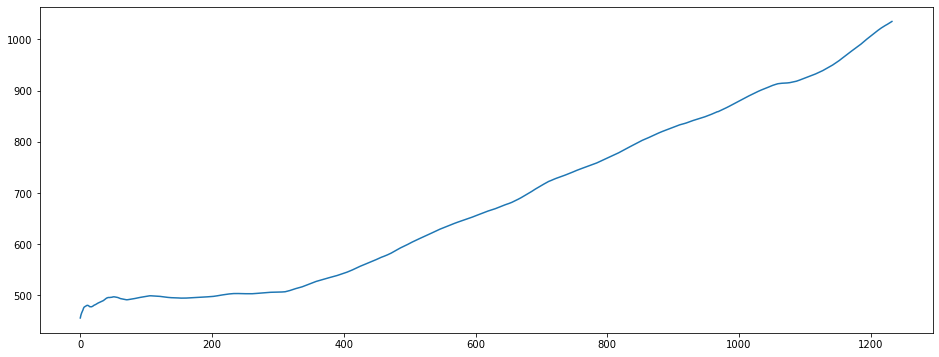

In [59]:
d['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [60]:
training_set=d['Open']
training_set=pd.DataFrame(training_set)

In [61]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [68]:
d.isna().any()

Date                  False
Open                   True
High                   True
Low                    True
Close                  True
Adj Close              True
Volume                 True
Close: 30 Day Mean     True
dtype: bool

In [69]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233 entries, 0 to 1232
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                1233 non-null   object 
 1   Open                1232 non-null   float64
 2   High                1232 non-null   float64
 3   Low                 1232 non-null   float64
 4   Close               1232 non-null   float64
 5   Adj Close           1232 non-null   float64
 6   Volume              1232 non-null   float64
 7   Close: 30 Day Mean  1174 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.2+ KB
